In [2]:
###### HISTOGRAM TECHNIQUES #####

import numpy as np
import matplotlib.pyplot as plt

def HistogramEqualization(imgArr):

  # Check input
  if not isinstance(imgArr, np.ndarray):
    raise TypeError("Input must be a numpy array")

  numLevels = 256

  # Get histogram
  histogram, bins = np.histogram(imgArr, bins = numLevels)

  # Get histogram transformation dictionary
  # Eq 3-15 in Digital Image Processing 4th
  histTransArr = np.zeros(numLevels)
  for i in range(numLevels):
    sum = 0
    for j in range(i):
      sum += histogram[j]/(imgArr.shape[0]*imgArr.shape[1])
    histTransArr[i] = int((numLevels-1) * sum)

  # Perform histogram equalization
  imgHistEqArr = np.zeros(imgArr.shape)
  for i in range(imgArr.shape[0]):
    for j in range(imgArr.shape[1]):
      imgHistEqArr[i,j] = histTransArr[imgArr[i,j]]


  #plt.plot(histTransArr)
  #plt.show()

  return imgHistEqArr

def LocalHistogramEqualization(imgArr):
  pass

###### PADDING FUNCTIONS ######

def ZeroPad(imgArr, padWidth = 1):
  numRow, numCol = imgArr.shape
  paddedShape = (numRow + 2*padWidth, numCol + 2*padWidth)
  padArr = np.zeros(paddedShape)
  # Copy the original array into the center of the padded array
  padArr[padWidth:numRow+padWidth, padWidth:numCol+padWidth] = imgArr
  return padArr

def ReplicatePad(imgArr, padWidth = 1):
  numRow, numCol = imgArr.shape
  # Start with a zero pad
  padArr = ZeroPad(imgArr, padWidth)
  # Replicate pad along rows
  for i in range(padWidth):
    padArr[i, padWidth:numCol+padWidth] = imgArr[0, :]
    padArr[i+numRow+padWidth,padWidth:numCol+padWidth] = imgArr[-1, :]
  # Replicate pad along columns
  for j in range(padWidth):
    padArr[:,j] = padArr[:,padWidth]
    padArr[:,j+numCol+padWidth] = padArr[:,numCol+padWidth-1]
  return padArr


def MirrorPad(imgArr, padWidth = 1):
  numRow, numCol = imgArr.shape
  # Start with a zero pad
  padArr = ZeroPad(imgArr, padWidth)
  # Mirror pad along rows
  for i in range(padWidth):
    padArr[i,padWidth:numCol+padWidth] = imgArr[padWidth-i,:]
    padArr[i+numRow+padWidth,padWidth:numCol+padWidth] = imgArr[numRow-i-2,:]
  # Mirror pad along columns
  for j in range(padWidth):
    padArr[:,j] = padArr[:,2*padWidth-j]
    padArr[:,j+numCol+padWidth] = padArr[:,numCol+padWidth-j-2]
  return padArr

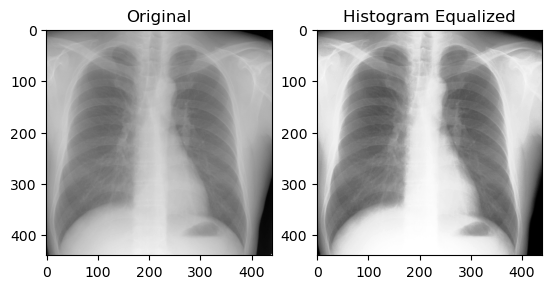

In [5]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt

# Use PIL to open the example unprocess chest xray
xrRawImg = Image.open("Images/ChestXR_Raw.tif")

# Use NumPy to convert images to numerical arrays
xrRawArr = asarray(xrRawImg)

# Perform global histogram equalization
xrHistEqArr = HistogramEqualization(xrRawArr)

# Display results
plt.subplot(1,2,1)
plt.imshow(xrRawArr, cmap = "gray")
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(xrHistEqArr, cmap = "gray")
plt.title("Histogram Equalized")
plt.show()